# FDA_hw4

#### Dataset

Tarvel Review Ratings ([source](https://archive.ics.uci.edu/ml/datasets/Tarvel+Review+Ratings))

#### Data Set Information

This data set is populated by capturing user ratings from Google reviews. Reviews on attractions from 24 categories across Europe are considered. Google user rating ranges from 1 to 5 and average user rating per category is calculated.

#### Attribute Information

* Attribute 1 : Unique user id 
* Attribute 2 : Average ratings on churches 
* Attribute 3 : Average ratings on resorts 
* Attribute 4 : Average ratings on beaches 
* Attribute 5 : Average ratings on parks 
* Attribute 6 : Average ratings on theatres 
* Attribute 7 : Average ratings on museums 
* Attribute 8 : Average ratings on malls 
* Attribute 9 : Average ratings on zoo 
* Attribute 10 : Average ratings on restaurants 
* Attribute 11 : Average ratings on pubs/bars 
* Attribute 12 : Average ratings on local services 
* Attribute 13 : Average ratings on burger/pizza shops 
* Attribute 14 : Average ratings on hotels/other lodgings 
* Attribute 15 : Average ratings on juice bars 
* Attribute 16 : Average ratings on art galleries 
* Attribute 17 : Average ratings on dance clubs 
* Attribute 18 : Average ratings on swimming pools 
* Attribute 19 : Average ratings on gyms 
* Attribute 20 : Average ratings on bakeries 
* Attribute 21 : Average ratings on beauty & spas 
* Attribute 22 : Average ratings on cafes 
* Attribute 23 : Average ratings on view points 
* Attribute 24 : Average ratings on monuments 
* Attribute 25 : Average ratings on gardens

In [361]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Preprocess the data

In [362]:
df = pd.read_csv('hw4dataset/google_review_ratings.csv')
df.head()

,User,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,...,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24,Unnamed: 25
0,User 1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
1,User 2,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
2,User 3,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
3,User 4,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN
4,User 5,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,...,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0,NaN


In [363]:
df.drop(['User', 'Unnamed: 25'], axis=1, inplace=True)
df.head()

,Category 1,Category 2,Category 3,Category 4,Category 5,Category 6,Category 7,Category 8,Category 9,Category 10,...,Category 15,Category 16,Category 17,Category 18,Category 19,Category 20,Category 21,Category 22,Category 23,Category 24
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [364]:
new_col_name = ['churches', 'resorts', 'beaches', 'parks', 'theatres', 
'museums', 'malls', 'zoo', 'restaurants', 'pubs/bars', 
'local services', 'burger/pizza shops', 'hotels/other lodgings', 'juice bars', 'art galleries',
'dance clubs', 'swimming pools','gyms', 'bakeries', 'beauty & spas', 
'cafes', 'view points', 'monuments', 'gardens']
df.columns = new_col_name
df.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [365]:
df.isnull().sum()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       1
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  1
dtype: int64

In [366]:
df.dropna(inplace=True)
df.isnull().sum()

churches                 0
resorts                  0
beaches                  0
parks                    0
theatres                 0
museums                  0
malls                    0
zoo                      0
restaurants              0
pubs/bars                0
local services           0
burger/pizza shops       0
hotels/other lodgings    0
juice bars               0
art galleries            0
dance clubs              0
swimming pools           0
gyms                     0
bakeries                 0
beauty & spas            0
cafes                    0
view points              0
monuments                0
gardens                  0
dtype: int64

In [367]:
df_float = pd.DataFrame(df, dtype=float)
df_float.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,3.63,3.65,5.0,2.92,5.0,2.64,2.33,2.65,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
3,0.0,0.5,3.63,3.63,5.0,2.92,5.0,2.35,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,3.63,3.63,5.0,2.92,5.0,2.64,2.33,2.64,...,1.74,0.59,0.5,0.0,0.5,0.0,0.0,0.0,0.0,0.0


In [368]:
arr = df_float.values
arr

array([[0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 3.63, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.94, 5.  , 4.03, ..., 5.  , 5.  , 1.11],
       [0.95, 4.05, 4.05, ..., 5.  , 5.  , 1.12],
       [0.95, 4.07, 5.  , ..., 5.  , 5.  , 1.17]])

In [369]:
#dff = df[~df.applymap(np.isreal).all(1)]
#dff

## Analyze the data

先觀察一下個項目的平均、標準差跟項目之間的相關係數。


In [370]:
from sklearn.decomposition import PCA

In [371]:
df_float.mean(axis=0).sort_values(ascending=False)

malls                    3.351476
restaurants              3.126542
theatres                 2.958904
museums                  2.893423
pubs/bars                2.832695
parks                    2.797103
local services           2.549622
zoo                      2.541177
beaches                  2.489059
resorts                  2.320048
art galleries            2.206140
juice bars               2.190429
hotels/other lodgings    2.125820
burger/pizza shops       2.078401
view points              1.749345
gardens                  1.560570
monuments                1.531051
churches                 1.455746
dance clubs              1.192710
beauty & spas            0.999626
bakeries                 0.969250
cafes                    0.965275
swimming pools           0.949349
gyms                     0.822525
dtype: float64

In [372]:
df_float.std().sort_values(ascending=False)

art galleries            1.715848
view points              1.597816
juice bars               1.576505
resorts                  1.421576
malls                    1.413291
hotels/other lodgings    1.406682
local services           1.381498
restaurants              1.356774
theatres                 1.338785
monuments                1.316180
parks                    1.309188
pubs/bars                1.307299
museums                  1.282101
burger/pizza shops       1.249315
beaches                  1.247503
bakeries                 1.202883
beauty & spas            1.193129
gardens                  1.171784
zoo                      1.111398
dance clubs              1.107176
swimming pools           0.973628
gyms                     0.948015
cafes                    0.928326
churches                 0.827732
dtype: float64

In [373]:
corr = df_float.corr()
corr

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
churches,1.000000,0.248970,0.149097,0.070810,0.035677,-0.092964,-0.264541,-0.181291,-0.290303,-0.274588,...,-0.135066,0.067343,0.130020,0.160288,0.180213,0.199331,0.309477,0.364726,0.407106,0.489249
resorts,0.248970,1.000000,0.325429,0.167332,0.153719,0.054090,-0.050117,-0.004703,-0.050811,-0.092441,...,-0.066598,-0.033044,-0.077300,-0.025568,0.032717,0.097168,0.089356,0.018869,0.077744,0.125254
beaches,0.149097,0.325429,1.000000,0.396694,0.329425,0.160567,-0.073423,-0.186372,-0.219795,-0.180092,...,-0.133955,-0.022477,-0.084304,-0.119516,-0.074712,-0.008469,0.002149,0.134288,0.118349,0.082810
parks,0.070810,0.167332,0.396694,1.000000,0.626787,0.315107,-0.068372,-0.128352,-0.169703,-0.116054,...,-0.271844,0.018217,-0.132399,-0.183780,-0.192069,-0.091816,-0.055253,0.277319,0.174384,0.090754
theatres,0.035677,0.153719,0.329425,0.626787,1.000000,0.489528,0.077164,-0.002728,-0.170545,-0.101121,...,-0.323627,-0.056550,-0.184121,-0.243168,-0.256297,-0.191270,-0.132344,0.124517,0.129130,0.099094
museums,-0.092964,0.054090,0.160567,0.315107,0.489528,1.000000,0.382338,0.200532,0.114800,-0.019901,...,-0.187154,-0.149552,-0.229388,-0.271169,-0.265931,-0.226674,-0.196501,-0.090693,-0.080253,-0.066224
malls,-0.264541,-0.050117,-0.073423,-0.068372,0.077164,0.382338,1.000000,0.406966,0.432183,0.255999,...,0.093076,-0.143057,-0.207111,-0.226317,-0.272284,-0.231715,-0.256882,-0.360561,-0.222391,-0.247402
zoo,-0.181291,-0.004703,-0.186372,-0.128352,-0.002728,0.200532,0.406966,1.000000,0.536705,0.551613,...,-0.064381,-0.124401,-0.203083,-0.236215,-0.280711,-0.254095,-0.274424,-0.255060,-0.167595,-0.137126
restaurants,-0.290303,-0.050811,-0.219795,-0.169703,-0.170545,0.114800,0.432183,0.536705,1.000000,0.564442,...,0.127070,-0.119796,-0.229793,-0.266880,-0.271680,-0.163753,-0.185619,-0.267527,-0.268188,-0.326456
pubs/bars,-0.274588,-0.092441,-0.180092,-0.116054,-0.101121,-0.019901,0.255999,0.551613,0.564442,1.000000,...,0.038642,-0.032137,-0.212123,-0.273656,-0.323441,-0.246766,-0.229392,-0.183937,-0.212255,-0.263339


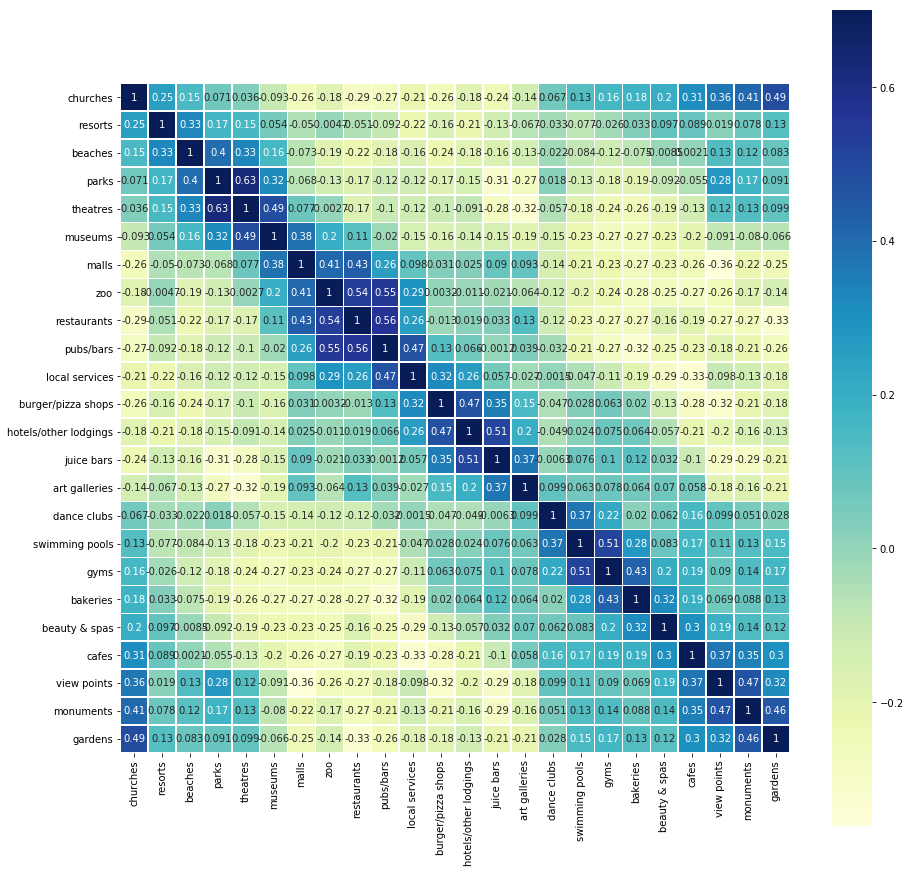

In [374]:
fig, ax = plt.subplots(figsize=(15,15))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            vmax=0.7,
            square=True,
            annot=True,
            ax=ax,
            cmap='YlGnBu',
            linewidths=.5)

所以我們可以看到最正相關的為: 

| N  | Category 1 | Category 2 | r
| -------- | -------- | -------- | --- |
|1.| park | theatres| 0.63
|2.| pubs/bars | restaurant | 0.56
|3.| zoo | pubs/bars| 0.55
|4.| zoo | restaurant | 0.54
|5.| hotels/other lodgings | juice bars| 0.51
|6.| swimming pools | gyms| 0.51
|7.| churches | gardens| 0.49
|8.| theatres | museums| 0.49
|9.| pubs/bars | local services| 0.47
|10.| hotels/other lodgings| burger/pizza shops | 0.47
|11.| views points | monuments| 0.47
|12.| gardens| monuments| 0.46 
|13.| gyms | backeries| 0.43
|14.| malls | restaurants| 0.43
|15.| churches | monuments| 0.41|
|16.| zoo| malls | 0.41
|17.| beaches | park| 0.4

最負相關的為: 

| N  | Category 1 | Category 2 | r
| -------- | -------- | -------- | --- |
|1.| malls | view points | -0.36
|2.| cafe | local services| -0.33
|3.| gardens | restaurants | -0.33
|4.| burgers/pizza shops | view points| -0.32
|5.| pubs/bars | backeries | -0.32
|6.| art galleries | theatres | -0.32
|7.| parks| juice bars | -0.31

可以觀察到，全部人當中大概有幾個「比較大」的族群:

1. 喜歡 zoo, pubs/bars, restaurants, malls, local services
2. 喜歡 park, theatre, museums, beaches
3. 喜歡 churches, gardens, monuments, view points, cafes
4. 喜歡 hotels/other lodgings, burger/pizza shops, juice bars, local services

其中(1)(3)兩類很明顯對立，(2)(4)兩類從圖中也可發現對立，(1)(4)兩類看起來則有部分重疊。

### Dimension reduction

PCA (Principal components analysis)

In [375]:
pca = PCA(n_components=2)
arr_pca = pca.fit(arr).transform(arr)
arr_pca

array([[-1.04699363, -2.5509079 ],
       [-1.09793068, -2.61894304],
       [-1.09999005, -2.61200365],
       ...,
       [ 5.92495511,  1.48535885],
       [ 4.71796177,  2.8861446 ],
       [ 5.90125086,  1.24500365]])

In [376]:
# Percentage of variance explained for each components
print('explained variance ratio (first two components): %s'
      % str(pca.explained_variance_ratio_))

explained variance ratio (first two components): [0.20038324 0.14756193]


Text(0.5, 1.0, 'PCA of the dataset')

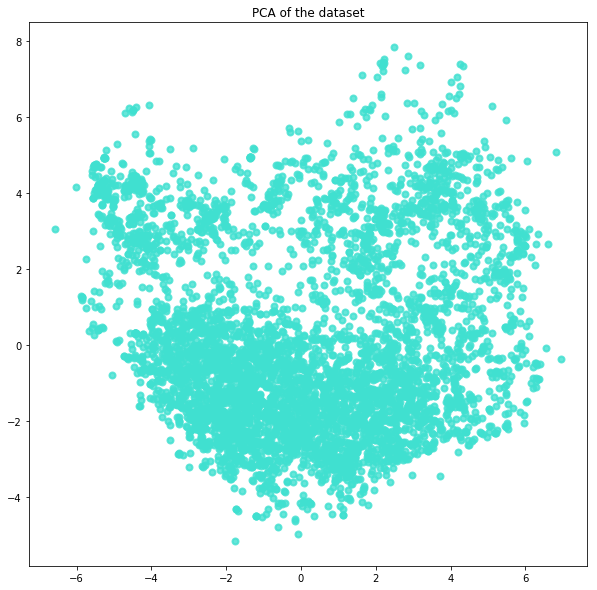

In [377]:
plt.figure(figsize=(10, 10))
#for i in range(len(arr_pca)):
plt.scatter(arr_pca[:, 0], arr_pca[:, 1], color='turquoise', alpha=.8, lw=2)
plt.title('PCA of the dataset')

## Define a reasonable problem: clustering

試著找出所有使用者中的喜好族群種類，是否真的如從相關係數觀察到的一樣?


In [378]:
from sklearn.cluster import KMeans

In [379]:
y_pred = KMeans(n_clusters=4, random_state=170).fit_predict(arr_pca)
y_pred

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Text(0.5, 1.0, 'K-Means')

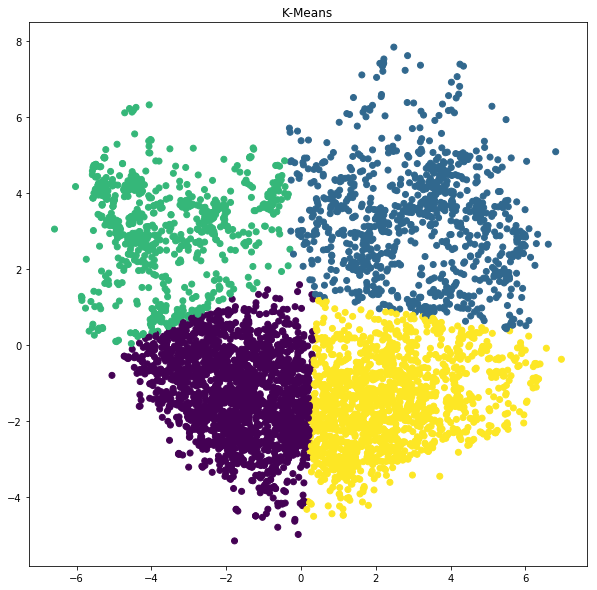

In [380]:
plt.figure(figsize=(10, 10))
plt.scatter(arr_pca[:, 0], arr_pca[:, 1], c=y_pred)
plt.title("K-Means")

In [381]:
arr2 = df_float[['malls', 'art galleries']].values
arr2

array([[5.  , 1.74],
       [5.  , 1.74],
       [5.  , 1.74],
       ...,
       [1.75, 0.87],
       [1.76, 5.  ],
       [2.42, 0.85]])

In [382]:
y_pred2 = KMeans(n_clusters=4, random_state=170).fit_predict(arr2)
y_pred2

array([2, 2, 2, ..., 0, 3, 0], dtype=int32)

Text(0.5, 1.0, 'K-Means: malls & art galleries')

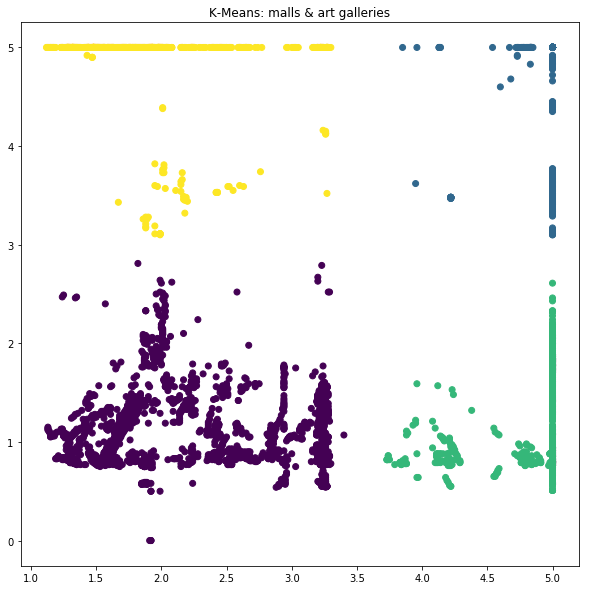

In [383]:
plt.figure(figsize=(10, 10))
plt.scatter(arr2[:, 0], arr2[:, 1], c=y_pred2)
plt.title("K-Means: malls & art galleries")

## How I improved my results

如果先對原資料做標準化，再用 PCA ，不知道 clustering 的結果會不會更清楚?

In [384]:
df_std = (df_float - df_float.mean()) / df_float.std()
df_std.head()

,churches,resorts,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,...,art galleries,dance clubs,swimming pools,gyms,bakeries,beauty & spas,cafes,view points,monuments,gardens
0,-1.758717,-1.632025,0.914579,0.651470,1.524588,0.020729,1.166443,-0.172015,-0.587085,-0.147399,...,-0.271668,-0.544367,-0.461521,-0.867628,-0.390104,-0.837819,-1.039802,-1.094836,-1.163253,-1.33179
1,-1.758717,-1.632025,0.914579,0.651470,1.524588,0.020729,1.166443,0.088918,-0.587085,-0.139750,...,-0.271668,-0.544367,-0.461521,-0.867628,-0.390104,-0.837819,-1.039802,-1.094836,-1.163253,-1.33179
2,-1.758717,-1.632025,0.914579,0.636194,1.524588,0.020729,1.166443,0.088918,-0.587085,-0.147399,...,-0.271668,-0.544367,-0.461521,-0.867628,-0.390104,-0.837819,-1.039802,-1.094836,-1.163253,-1.33179
3,-1.758717,-1.280303,0.914579,0.636194,1.524588,0.020729,1.166443,-0.172015,-0.587085,-0.147399,...,-0.271668,-0.544367,-0.461521,-0.867628,-0.390104,-0.837819,-1.039802,-1.094836,-1.163253,-1.33179
4,-1.758717,-1.632025,0.914579,0.636194,1.524588,0.020729,1.166443,0.088918,-0.587085,-0.147399,...,-0.271668,-0.544367,-0.461521,-0.867628,-0.390104,-0.837819,-1.039802,-1.094836,-1.163253,-1.33179


In [385]:
arr_std = df_std.values

In [386]:
arr_pca_std = pca.fit(arr_std).transform(arr_std)
arr_pca_std

array([[-1.89253415, -1.60353018],
       [-1.96477789, -1.63679236],
       [-1.96424389, -1.63118295],
       ...,
       [ 3.92790299, -0.83062857],
       [ 3.67908382, -0.12193133],
       [ 3.90236542, -1.01562987]])

Text(0.5, 1.0, 'PCA of the std dataset')

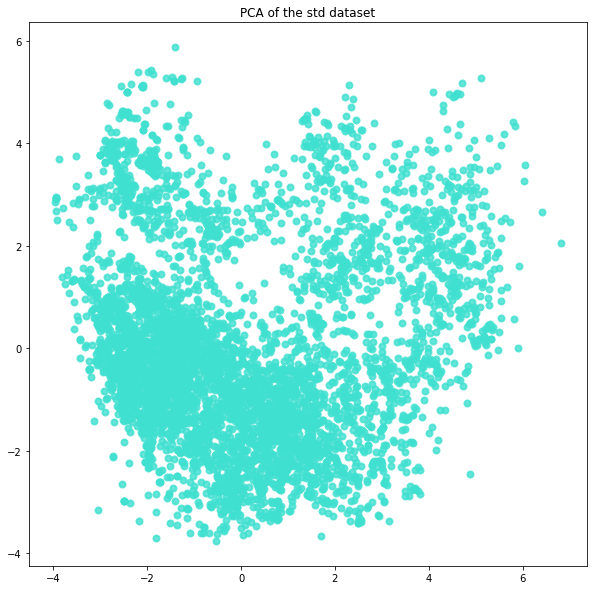

In [387]:
plt.figure(figsize=(10, 10))
plt.scatter(arr_pca_std[:, 0], arr_pca_std[:, 1], color='turquoise', alpha=.8, lw=2)
plt.title('PCA of the std dataset')

In [388]:
y_pred_std = KMeans(n_clusters=4, random_state=170).fit_predict(arr_pca_std)
y_pred_std

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

Text(0.5, 1.0, 'std K-Means')

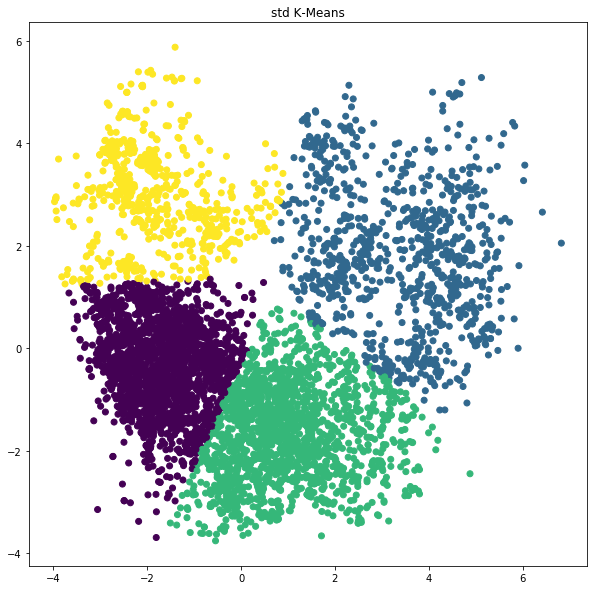

In [389]:
plt.figure(figsize=(10, 10))
plt.scatter(arr_pca_std[:, 0], arr_pca_std[:, 1], c=y_pred_std)
plt.title("std K-Means")

資料點似乎更分散了一點點，但不同分類之間的界線還是很模糊不清楚。

若丟棄一些跟我定義的分類無關的 attributes。

In [390]:
df_dro = df_std.drop(['resorts', 'dance clubs', 'beauty & spas', 'gyms', 'swimming pools'], axis=1)
df_dro.head()

,churches,beaches,parks,theatres,museums,malls,zoo,restaurants,pubs/bars,local services,burger/pizza shops,hotels/other lodgings,juice bars,art galleries,bakeries,cafes,view points,monuments,gardens
0,-1.758717,0.914579,0.651470,1.524588,0.020729,1.166443,-0.172015,-0.587085,-0.147399,-0.615001,-0.310891,-0.302712,-0.2984,-0.271668,-0.390104,-1.039802,-1.094836,-1.163253,-1.33179
1,-1.758717,0.914579,0.651470,1.524588,0.020729,1.166443,0.088918,-0.587085,-0.139750,-0.615001,-0.310891,-0.302712,-0.2984,-0.271668,-0.390104,-1.039802,-1.094836,-1.163253,-1.33179
2,-1.758717,0.914579,0.636194,1.524588,0.020729,1.166443,0.088918,-0.587085,-0.147399,-0.615001,-0.310891,-0.302712,-0.2984,-0.271668,-0.390104,-1.039802,-1.094836,-1.163253,-1.33179
3,-1.758717,0.914579,0.636194,1.524588,0.020729,1.166443,-0.172015,-0.587085,-0.147399,-0.593285,-0.310891,-0.302712,-0.2984,-0.271668,-0.390104,-1.039802,-1.094836,-1.163253,-1.33179
4,-1.758717,0.914579,0.636194,1.524588,0.020729,1.166443,0.088918,-0.587085,-0.147399,-0.615001,-0.310891,-0.302712,-0.2984,-0.271668,-0.390104,-1.039802,-1.094836,-1.163253,-1.33179


In [391]:
arr_dro = df_dro.values

In [392]:
arr_pca_dro = pca.fit(arr_dro).transform(arr_dro)
arr_pca_dro

array([[-1.03198433, -1.83624554],
       [-1.09967148, -1.89993164],
       [-1.10033221, -1.89360605],
       ...,
       [ 3.45278523,  0.11413322],
       [ 3.13819601,  0.75353998],
       [ 3.55687687, -0.15909133]])

Text(0.5, 1.0, 'PCA of the std dataset that drop some attibutes')

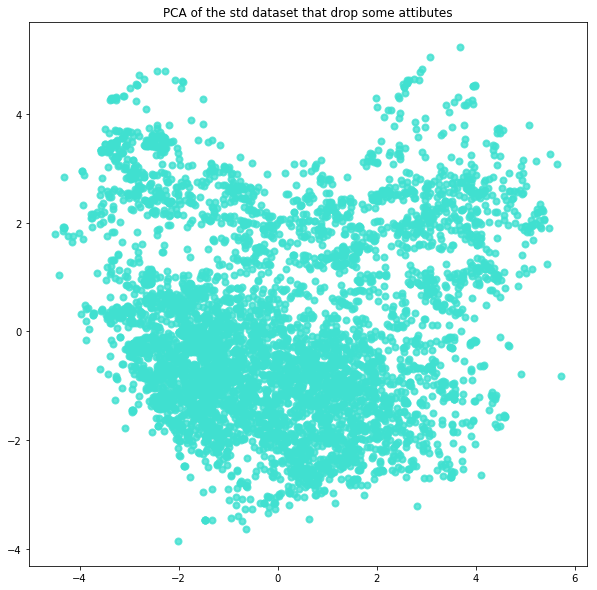

In [393]:
plt.figure(figsize=(10, 10))
plt.scatter(arr_pca_dro[:, 0], arr_pca_dro[:, 1], color='turquoise', alpha=.8, lw=2)
plt.title('PCA of the std dataset that drop some attibutes')

In [394]:
y_pred_dro = KMeans(n_clusters=4, random_state=170).fit_predict(arr_pca_dro)
y_pred_dro

array([2, 2, 2, ..., 3, 3, 3], dtype=int32)

Text(0.5, 1.0, 'std drop K-Means')

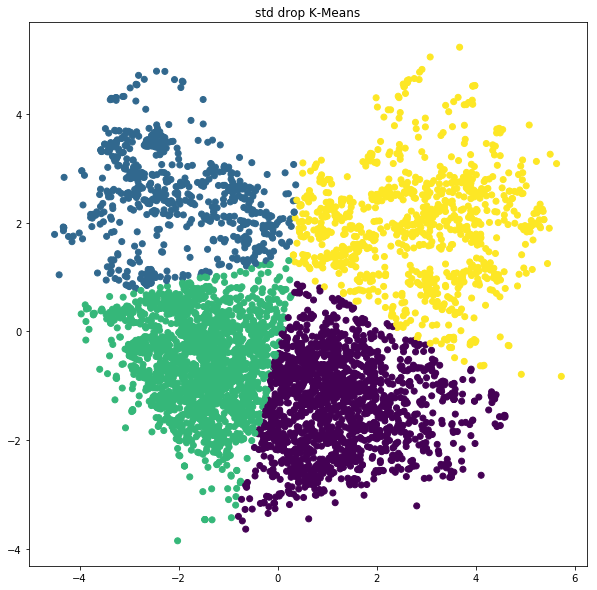

In [395]:
plt.figure(figsize=(10, 10))
plt.scatter(arr_pca_dro[:, 0], arr_pca_dro[:, 1], c=y_pred_dro)
plt.title("std drop K-Means")

似乎也沒有太大的差異。

### DBSCAN

In [396]:
from sklearn.cluster import DBSCAN

Text(0.5, 1.0, 'DBSCAN')

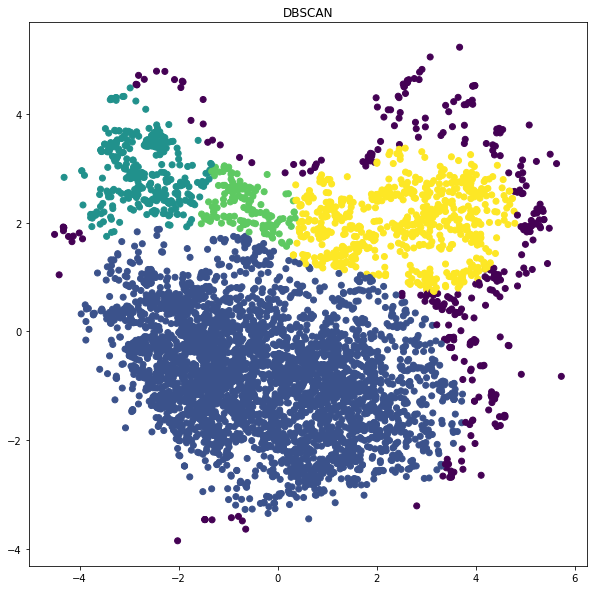

In [397]:
db = DBSCAN(eps=0.8, min_samples=148).fit(arr_pca_dro)

plt.figure(figsize=(10, 10))
plt.scatter(arr_pca_dro[:, 0], arr_pca_dro[:, 1], c=db.labels_)
plt.title("DBSCAN")

### Improvement